In [1]:
#@title 1. Setup
from IPython.display import clear_output
!git clone https://github.com/gnobitab/InstaFlow InstaFlow_Colab
%pip install torch torchvision torchaudio diffusers transformers accelerate gradio controlnet_aux
%mkdir /content/imgs
%cd /content/InstaFlow_Colab/code
clear_output()

In [2]:
#@title 2. Load model
import torch

model = 'XCLiu/instaflow_0_9B_from_sd_1_5' # @param ["XCLiu/instaflow_0_9B_from_sd_1_5"] {allow-input: true}
torch_dtype = torch.float16 # @param [torch.float16,torch.float32]{type:"raw"}

from pipeline_rf import RectifiedFlowPipeline


pipe = RectifiedFlowPipeline.from_pretrained("XCLiu/instaflow_0_9B_from_sd_1_5", torch_dtype=torch.float16)
### switch to torch.float32 for higher quality
pipe.requires_safety_checker = False
pipe.safety_checker = None
pipe.to("cuda")  ### if GPU is not available, comment this line

clear_output()

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.42400693893432617 s


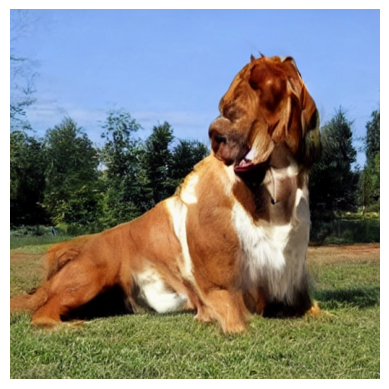

/content/imgs/image0.png


  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.30594754219055176 s


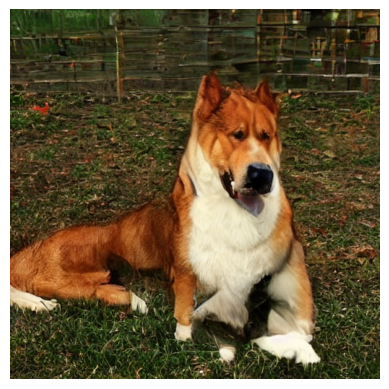

/content/imgs/image1.png


In [4]:
#@title 3. Run
prompt = "A big dog" # @param
number_of_images = 2 # @param
display_images = True # @param {type:"boolean"}
save_images = True # @param {type:"boolean"}

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

### InstaFlow-0.9B is a one-step text-to-image generative model.
### It only allows num_inference_steps=1 and guidance_scale=0.0; it does not support negative prompts (for now)
import time
for i in range(0,number_of_images):
    time_0=time.time()
    images = pipe(prompt=prompt,
                num_inference_steps=1,
                guidance_scale=0.0).images
    print(f"time: {(time.time()-time_0)} s")

    if display_images:
      plt.imshow(images[0])
      plt.axis("off")
      plt.show()
    if save_images:
      img_path = f"/content/imgs/image{i}.png"
      images[0].save(img_path)
      print(img_path)